In [ ]:
import numpy as np
from typing import *
import random
import matplotlib.pyplot as plt
import simanneal

In [155]:
class Task: 
    """
    This class is to define an environment that the agent will act on. 
    """
    states: List[str] = []
    rewards: Dict[Tuple[str, str], Callable] = {} #mapping from state, action tuple to a function 
    transitions: Dict[Tuple[str, str], str] = {} # This is a mapping from state,action tuple to the new state
        
    def __init__(self, states: List[str], rewards: Dict[Tuple[str, str], Callable], transitions: Dict[Tuple[str, str], str]) -> None:
        self.states = states
        print(rewards)
        
        for key in rewards:
            print(key)
            typecheck = type(lambda : 10)
            if type(rewards[key]) != typecheck: 
                temp = float(rewards[key])
                func = lambda : temp
                rewards[key] = func
        
        self.rewards = rewards
        self.transitions = transitions
        
    def make_action(self, state: str, action: str) -> Tuple[str, float]: 
        """
        This function takes in a proposed state and action, executes it on 
        the environment, then returns a tuple with the next state as the 
        first value and the reward as the second value. 
        """
        reward: float = self.rewards[(state, action)]()
        new_state: str = self.transitions[(state,action)]
        return (new_state, reward)
    
    def get_legal_actions(self, state: str) -> List[str]:
        """
        This will return a list of legal actions from a given state.
        """
        actions: List[str] = []
        for key in self.transitions:
            if state in key: 
                actions.append(key[1])
        return actions


class Parameters:
    """
    This is just a shell class to hold the parameters
    """
    learning_rate: float = 0 #alpha, how quick the agent learns
    discount_factor: float = 0 # discount rate
    exploration_prob: float = 0 #epsilon
    def __init__(self):
        self.learning_rate = lambda: random.uniform(0, 1)
        self.discount_faction = random.uniform(0, 1)
        self.discount_faction = random.uniform(0, 1)
    def set_params(self, learning_rate: float, discount_factor: float) -> None:
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        
    def set_learning_rate(self, alpha: float) -> None:
        self.learning_rate = alpha
        
    def set_discount_factor(self, gamma: float) -> None: 
        self.discount_factor = gamma
        

    def set_random_params(self) -> None:
        self.__init__()


class q_learning_agent:
    q_values: Dict[Tuple[str, str], float] = {}
    task: Task = None
    current_state: str = None
        
    def __init__(self, iterations: int = 1000, task: Task = None, initial_state: str = None, \
                 parameters: Parameters = Parameters()) -> None:
        self.iterations = iterations
        self.parameters = parameters
        self.task = task
        self.current_state =initial_state 
        self.initialize_q_params()
        
    def initialize_q_params(self) -> None:
        for key in self.task.transitions:
            self.q_values[key] = 0
                
    def update_q_values(self, state, action, next_state, reward, iteration) -> None: 
        alpha = self.parameters.learning_rate(iteration)
        gamma = self.parameters.discount_factor
        next_state_q_vals = {key:value for (key,value) in self.q_values.items() if next_state in key}
        old_q = self.q_values[(state, action)]
        new_q = (1-alpha) * old_q + alpha * (reward + gamma *\
                                             next_state_q_vals[max(next_state_q_vals, key = next_state_q_vals.get)])
        self.q_values[(state, action)] = new_q
        
                
    def choose_action(self, state) -> str:
        legal_actions = self.task.get_legal_actions(state)
        num = random.uniform(0, 1)
        if num <= self.parameters.exploration_prob:
            return random.choice(legal_actions)
        
        state_q_values =  {key:value for (key,value) in self.q_values.items() if state in key}
        return max(self.q_values, key= self.q_values.get)[1]
        
    def run_q_learning(self) -> list:
        actions: List[str]  = []
        i: int = 0
        while i <= self.iterations:
            i += 1
            action = self.choose_action(self.current_state)
            actions.append(action)
            next_state, reward = task.make_action(self.current_state, action)
            self.update_q_values(self.current_state, action, next_state, reward, iteration = i)
            print("The current state is: " + self.current_state)
            print("The given action is: " + action)
            print("The q values are as follows:" +str(self.q_values))
            print("Reward for next state is: " + str(reward))
            print("\n\n\n")
            self.current_state = next_state
        
        return actions

In [158]:

states = ["center"]
actions = {"center": ["left", "right", "nothing"]}
rewards = {("center", "left"): lambda : np.random.choice([10, -1], p = [.8, .2]), ("center", "right"): lambda : np.random.choice([10, -1], p = [.2, .8]), ("center", "nothing"): -1}
transitions = {("center", "left"): "center", ("center", "right"): "center", ("center", "nothing"): "center"}
task = Task(states, rewards, transitions)

qlearn = q_learning_agent(task = task, initial_state= "center", iterations = 10000 )
qlearn.parameters.exploration_prob = .7
qlearn.parameters.set_learning_rate(lambda x: 1/(x+1))
qlearn.run_q_learning()

{('center', 'left'): <function <lambda> at 0x7f68462d3bf8>, ('center', 'right'): <function <lambda> at 0x7f68462d3b70>, ('center', 'nothing'): -1}
('center', 'left')
('center', 'right')
('center', 'nothing')
The current state is: center
The given action is: right
The q values are as follows:{('center', 'left'): 0, ('center', 'right'): -0.5, ('center', 'nothing'): 0}
Reward for next state is: -1




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 3.333333333333333, ('center', 'right'): -0.5, ('center', 'nothing'): 0}
Reward for next state is: 10




The current state is: center
The given action is: right
The q values are as follows:{('center', 'left'): 3.333333333333333, ('center', 'right'): -0.625, ('center', 'nothing'): 0}
Reward for next state is: -1




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 3.333333333333333, ('center', 'right'): -0.625, ('center', 'nothing'):

The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.174238179864706, ('center', 'right'): 0.7498735475214983, ('center', 'nothing'): -0.7165847829864621}
Reward for next state is: 10




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.160430345101421, ('center', 'right'): 0.7498735475214983, ('center', 'nothing'): -0.7165847829864621}
Reward for next state is: -1




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.165218826812886, ('center', 'right'): 0.7498735475214983, ('center', 'nothing'): -0.7165847829864621}
Reward for next state is: 10




The current state is: center
The given action is: right
The q values are as follows:{('center', 'left'): 7.165218826812886, ('center', 'right'): 0.7469276324583307, ('center', 'nothing'): -0.7165847829864621}
Reward for next state is: -1




The current state is: center
The gi

The q values are as follows:{('center', 'left'): 7.137824512046522, ('center', 'right'): 0.806330694702786, ('center', 'nothing'): -0.7631878832719513}
Reward for next state is: 10




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.140217635364208, ('center', 'right'): 0.806330694702786, ('center', 'nothing'): -0.7631878832719513}
Reward for next state is: 10




The current state is: center
The given action is: right
The q values are as follows:{('center', 'left'): 7.140217635364208, ('center', 'right'): 0.8048216465033684, ('center', 'nothing'): -0.7631878832719513}
Reward for next state is: -1




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.140217635364208, ('center', 'right'): 0.8048216465033684, ('center', 'nothing'): -0.763385556157367}
Reward for next state is: -1.0




The current state is: center
The given action is: left
The q values are as follows:{('ce

The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.208948036993648, ('center', 'right'): 0.8264326275329117, ('center', 'nothing'): -0.7846726059921199}
Reward for next state is: 10




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.2104883526465215, ('center', 'right'): 0.8264326275329117, ('center', 'nothing'): -0.7846726059921199}
Reward for next state is: 10




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.212026969109486, ('center', 'right'): 0.8264326275329117, ('center', 'nothing'): -0.7846726059921199}
Reward for next state is: 10




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.212026969109486, ('center', 'right'): 0.8264326275329117, ('center', 'nothing'): -0.7847913090759169}
Reward for next state is: -1.0




The current state is: center
T

The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.279754938315478, ('center', 'right'): 0.8673392228662016, ('center', 'nothing'): -0.7971905456571382}
Reward for next state is: 10




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.276356024137188, ('center', 'right'): 0.8673392228662016, ('center', 'nothing'): -0.7971905456571382}
Reward for next state is: -1




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.276356024137188, ('center', 'right'): 0.8673392228662016, ('center', 'nothing'): -0.797273766606807}
Reward for next state is: -1.0




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.276356024137188, ('center', 'right'): 0.8673392228662016, ('center', 'nothing'): -0.7973569192866238}
Reward for next state is: -1.0




The current state is: cente

The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.280821279795257, ('center', 'right'): 0.9111350492089817, ('center', 'nothing'): -0.8067247255259546}
Reward for next state is: 10




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.280821279795257, ('center', 'right'): 0.9111350492089817, ('center', 'nothing'): -0.8067884286487214}
Reward for next state is: -1.0




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.281717220065506, ('center', 'right'): 0.9111350492089817, ('center', 'nothing'): -0.8067884286487214}
Reward for next state is: 10




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.281717220065506, ('center', 'right'): 0.9111350492089817, ('center', 'nothing'): -0.8068520688237383}
Reward for next state is: -1.0




The current state is: cent

The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.342513836611961, ('center', 'right'): 0.9211565554351308, ('center', 'nothing'): -0.8148095070820228}
Reward for next state is: -1.0




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.340221307390578, ('center', 'right'): 0.9211565554351308, ('center', 'nothing'): -0.8148095070820228}
Reward for next state is: -1




The current state is: center
The given action is: right
The q values are as follows:{('center', 'left'): 7.340221307390578, ('center', 'right'): 0.9206287651726486, ('center', 'nothing'): -0.8148095070820228}
Reward for next state is: -1




The current state is: center
The given action is: right
The q values are as follows:{('center', 'left'): 7.340221307390578, ('center', 'right'): 0.9201012648251691, ('center', 'nothing'): -0.8148095070820228}
Reward for next state is: -1




The current state is: center


The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.388916146567097, ('center', 'right'): 0.9266708279176217, ('center', 'nothing'): -0.8219945551914759}
Reward for next state is: 10




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.388916146567097, ('center', 'right'): 0.9266708279176217, ('center', 'nothing'): -0.8220362719584805}
Reward for next state is: -1.0




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.3895279281634965, ('center', 'right'): 0.9266708279176217, ('center', 'nothing'): -0.8220362719584805}
Reward for next state is: 10




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.3895279281634965, ('center', 'right'): 0.9266708279176217, ('center', 'nothing'): -0.8220779594094155}
Reward for next state is: -1.0




The current state is: ce

The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.404178213779924, ('center', 'right'): 0.950004279881065, ('center', 'nothing'): -0.8269955859067715}
Reward for next state is: 10




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.404178213779924, ('center', 'right'): 0.950004279881065, ('center', 'nothing'): -0.82703118352284}
Reward for next state is: -1.0




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.404178213779924, ('center', 'right'): 0.950004279881065, ('center', 'nothing'): -0.8270667664926975}
Reward for next state is: -1.0




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.404712113777091, ('center', 'right'): 0.950004279881065, ('center', 'nothing'): -0.8270667664926975}
Reward for next state is: 10




The current state is: center
The

The current state is: center
The given action is: right
The q values are as follows:{('center', 'left'): 7.448880552257182, ('center', 'right'): 0.9590446736302335, ('center', 'nothing'): -0.8320606698937144}
Reward for next state is: -1




The current state is: center
The given action is: right
The q values are as follows:{('center', 'left'): 7.448880552257182, ('center', 'right'): 0.9606896800578845, ('center', 'nothing'): -0.8320606698937144}
Reward for next state is: 10




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.449344645298431, ('center', 'right'): 0.9606896800578845, ('center', 'nothing'): -0.8320606698937144}
Reward for next state is: 10




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.449808569517184, ('center', 'right'): 0.9606896800578845, ('center', 'nothing'): -0.8320606698937144}
Reward for next state is: 10




The current state is: center
The g

The given action is: right
The q values are as follows:{('center', 'left'): 7.498063572462894, ('center', 'right'): 0.9959791437238531, ('center', 'nothing'): -0.8362061740394697}
Reward for next state is: -1




The current state is: center
The given action is: right
The q values are as follows:{('center', 'left'): 7.498063572462894, ('center', 'right'): 0.9956531098878968, ('center', 'nothing'): -0.8362061740394697}
Reward for next state is: -1




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.498063572462894, ('center', 'right'): 0.9956531098878968, ('center', 'nothing'): -0.8362329246234907}
Reward for next state is: -1.0




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.498472118581042, ('center', 'right'): 0.9956531098878968, ('center', 'nothing'): -0.8362329246234907}
Reward for next state is: 10




The current state is: center
The given action is: left
The

The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.496459728881398, ('center', 'right'): 0.995705941575878, ('center', 'nothing'): -0.8398521773409053}
Reward for next state is: -1




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.496831284279308, ('center', 'right'): 0.995705941575878, ('center', 'nothing'): -0.8398521773409053}
Reward for next state is: 10




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.49720272940703, ('center', 'right'): 0.995705941575878, ('center', 'nothing'): -0.8398521773409053}
Reward for next state is: 10




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.497574064313645, ('center', 'right'): 0.995705941575878, ('center', 'nothing'): -0.8398521773409053}
Reward for next state is: 10




The current state is: center
The given ac





The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.513540360678114, ('center', 'right'): 0.9891587163290382, ('center', 'nothing'): -0.8429798682773305}
Reward for next state is: -1.0




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.513540360678114, ('center', 'right'): 0.9891587163290382, ('center', 'nothing'): -0.8430011938418724}
Reward for next state is: -1.0




The current state is: center
The given action is: right
The q values are as follows:{('center', 'left'): 7.513540360678114, ('center', 'right'): 0.9888885970030835, ('center', 'nothing'): -0.8430011938418724}
Reward for next state is: -1




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.513877965517126, ('center', 'right'): 0.9888885970030835, ('center', 'nothing'): -0.8430011938418724}
Reward for next state is: 10




The current state is:

The q values are as follows:{('center', 'left'): 7.534141955494055, ('center', 'right'): 0.9874298462931527, ('center', 'nothing'): -0.845859121411989}
Reward for next state is: -1.0




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.533073986284258, ('center', 'right'): 0.9874298462931527, ('center', 'nothing'): -0.845859121411989}
Reward for next state is: -1




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.533382660710399, ('center', 'right'): 0.9874298462931527, ('center', 'nothing'): -0.845859121411989}
Reward for next state is: 10




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.533382660710399, ('center', 'right'): 0.9874298462931527, ('center', 'nothing'): -0.8458784058957358}
Reward for next state is: -1.0




The current state is: center
The given action is: left
The q values are as follows:{('c

The q values are as follows:{('center', 'left'): 7.535373394405882, ('center', 'right'): 0.9921388505352299, ('center', 'nothing'): -0.8485846928567333}
Reward for next state is: -1




The current state is: center
The given action is: right
The q values are as follows:{('center', 'left'): 7.535373394405882, ('center', 'right'): 0.9931821515717674, ('center', 'nothing'): -0.8485846928567333}
Reward for next state is: 10




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.535658817290143, ('center', 'right'): 0.9931821515717674, ('center', 'nothing'): -0.8485846928567333}
Reward for next state is: 10




The current state is: center
The given action is: right
The q values are as follows:{('center', 'left'): 7.535658817290143, ('center', 'right'): 0.9929513523416177, ('center', 'nothing'): -0.8485846928567333}
Reward for next state is: -1




The current state is: center
The given action is: nothing
The q values are as follows:{('

The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.54884083221278, ('center', 'right'): 1.0062519365677398, ('center', 'nothing'): -0.851236079741979}
Reward for next state is: -1




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.549105250677482, ('center', 'right'): 1.0062519365677398, ('center', 'nothing'): -0.851236079741979}
Reward for next state is: 10




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.549105250677482, ('center', 'right'): 1.0062519365677398, ('center', 'nothing'): -0.85125212589884}
Reward for next state is: -1.0




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.548183216030084, ('center', 'right'): 1.0062519365677398, ('center', 'nothing'): -0.85125212589884}
Reward for next state is: -1




The current state is: center
The given

The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.56260791189319, ('center', 'right'): 1.0148132639685503, ('center', 'nothing'): -0.8532459635003912}
Reward for next state is: 10




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.562854038530381, ('center', 'right'): 1.0148132639685503, ('center', 'nothing'): -0.8532459635003912}
Reward for next state is: 10




The current state is: center
The given action is: left
The q values are as follows:{('center', 'left'): 7.561989453106459, ('center', 'right'): 1.0148132639685503, ('center', 'nothing'): -0.8532459635003912}
Reward for next state is: -1




The current state is: center
The given action is: nothing
The q values are as follows:{('center', 'left'): 7.561989453106459, ('center', 'right'): 1.0148132639685503, ('center', 'nothing'): -0.853260779657534}
Reward for next state is: -1.0




The current state is: center
The 

['right',
 'left',
 'right',
 'nothing',
 'left',
 'left',
 'left',
 'nothing',
 'right',
 'left',
 'nothing',
 'right',
 'right',
 'right',
 'left',
 'left',
 'left',
 'right',
 'right',
 'right',
 'left',
 'nothing',
 'left',
 'nothing',
 'left',
 'right',
 'left',
 'left',
 'left',
 'left',
 'nothing',
 'left',
 'left',
 'right',
 'right',
 'right',
 'nothing',
 'right',
 'nothing',
 'nothing',
 'left',
 'nothing',
 'left',
 'left',
 'nothing',
 'left',
 'right',
 'left',
 'right',
 'nothing',
 'right',
 'nothing',
 'nothing',
 'right',
 'left',
 'right',
 'nothing',
 'left',
 'left',
 'left',
 'right',
 'right',
 'left',
 'left',
 'left',
 'left',
 'left',
 'left',
 'left',
 'left',
 'nothing',
 'left',
 'right',
 'nothing',
 'nothing',
 'left',
 'left',
 'left',
 'left',
 'right',
 'right',
 'right',
 'right',
 'left',
 'nothing',
 'left',
 'left',
 'right',
 'left',
 'nothing',
 'right',
 'right',
 'right',
 'nothing',
 'nothing',
 'left',
 'nothing',
 'right',
 'left',
 'left',


In [157]:
temp = lambda : 10
temp()
typecheck = type(lambda : 10)
typecheck

function

In [7]:
class plot_normal:
    """
    This is a very basic plotting class to plot normal 
    distributions along with a fit curve. Here's a standard
    use case: 
    normal = np.random.normal(mean,std,5000)
    w1,x1,z1 = plt.hist(normal, 100, density = True)
    hist = plot_normal(mean,std, x1)
    plot = hist.dist_curve()
    """

    def __init__(self, a1: float, b1: float, c1: float) -> None:
        self.a1 = a1
        self.b1 = b1
        self.c1 = c1
        
    def dist_curve(self):
        plt.plot(self.c1, 1/(self.b1 * np.sqrt(2 * np.pi)) *
            np.exp( - (self.c1 - self.a1)**2 / (2 * self.b1**2) ), linewidth=2, color='y')
        plt.show()

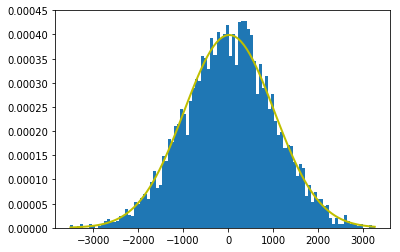

In [8]:
normal = np.random.normal(25,1000,5000)
w1,x1,z1 = plt.hist(normal, 100, density = True)
hist = plot_normal(25,1000, x1)
plot = hist.dist_curve()

In [10]:
def test():
    print("rip")
    
type(test)

function

In [ ]:
class parameter_optimizer_q_learning:
    